# U-spline Tutorial in Jupyter using the Julia language

In [126]:
using SymPy
using Plots
using PyPlot
plt = PyPlot

PyPlot

## Review of the Bernstein basis

The Bernstein basis functions are a set of basis functions that span the polynomial space. Just as the basis

$$
x^i \text{, }i\in{0...p}
$$

span the polynomial space of degree $p$, the Bernstein basis functions of degree $p$ also span the same space.

In general, the $i$-th Bernstein basis function of degree $p$ is defined as

$$
B_{i,p}(t) = \binom{p}{i} t^i (1-t)^{p-i}
$$

However, to provide some reasoning behind this definition, the following motivation for the construction of the Bernstein basis is helpful.

We may begin with the idea that these functions form a partition of unity, which means the sum of the functions equals 1.

$$
\sum_i f_i = 1
$$

The simplest set of functions that has partition of unity is the function $f(t)=1$.
If we wanted to introduce some variation as a function of $t$, we must ensure that no matter what value $t$ has, the total sum still equals $1$.  One way to do this is

$$
(1-t)+t
$$

If we raise this expression to a power of $p$, the property of partition of unity continues to be true. Thus we have

$$
((1-t)+t)^p
$$

Now, suppose we expand this expression for a given value of $p$.  If $p=0$, we have

$$
1
$$

If $p=1$ we have

$$
(1-t)+t
$$

If $p=2$ we have

$$
(1 - t)^2 + 2 (1 - t) t + t^2
$$

If $p=3$ we have

$$
(1 - t)^3 + 3 (1 - t)^2 t + 3 (1 - t) t^2 + t^3
$$

For a given value of $p$, the $i$-th Bernstein basis function is the $i$-th term in these expanded expressions.
Thus, for $p=3$, the Bernstein basis functions are

$$
(1 - t)^3
$$

$$
3 (1 - t)^2 t
$$

$$
3 (1 - t) t^2
$$

$$
t^3
$$



# Plotting the Bernstein basis

What do these Bernstein functions look like? We can plot them using Julia.

First, we can build the Bernstein basis of degree $p$ using some symbolic manipulation using the library SymPy.  Note: A great simple example of using SymPy can be found here: https://nbviewer.jupyter.org/github/sylvaticus/juliatutorial/blob/master/assets/Symbolic%20computation.ipynb

This first example is for quadratic ($p=2$) Bernstein basis functions.  The reader may change the value of $p$ and re-run the next few cells to see the result for other degrees.

In [127]:
#using SymPy

# Define the variables
a,b,t = symbols("a,b,t", real=true)

# Set the degree
p = 2

# Create the first expression (with 'a' and 'b' substituted
# in for (1-t) and t, which we will put back in later)
expr1 = (a+b)^p

       2
(a + b) 

In [128]:
expr2 = SymPy.expand(expr1)

 2            2
a  + 2⋅a⋅b + b 

In [129]:
expr3 = subs(expr2, a=>(1-t), b=>t)

 2                        2
t  + 2⋅t⋅(1 - t) + (1 - t) 

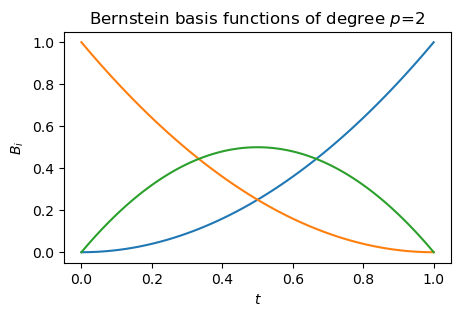

PyObject Text(26.4, 0.5, '$B_i$')

In [130]:
#using PyPlot
#plt = PyPlot

# Grab each term in the expression
B = Array{Any,1}()
for j = 1:(p+1)
    push!( B, expr3.args[j] )
end

# Evaluate each term at all the points in 'x', going from 0 to 1
h = 0.01
x = collect(0:h:1)[:]
BEvals = zeros(p+1,length(x))
for i = 1:length(x)
    for j = 1:(p+1)
        BEvals[j,i] = subs(B[j], t=>x[i]).evalf()
    end
end

# Plot each function from 0 to 1
figure_size = (5, 3)
plt.figure(figsize=figure_size)
for j = 1:(p+1)
    plt.plot(x,BEvals[j,:])
end

plt.title("Bernstein basis functions of degree \$p\$="*string(p))
plt.xlabel("\$t\$")
plt.ylabel("\$B_i\$")

More efficiently, a function that evaluates the $a$-th Bernstein basis of degree $p$ may be defined as follows.

In [131]:
"""
function bernstein_basis(a::Int64,
                        p::Int64,
                        t::Float64;
                        dmin::Float64=0.,
                        dmax::Float64=1.)::Union{Float64,ComplexF64}
============================
# Parameters
* a: The function index
* p: The polynomial degree
* t: The parameter value where the basis function is to be evaluated

# Named Parameters
* dmin: The minimum value of the domain
* dmax: The maximum value of the domain
"""
function bernstein_basis(a::Int64,
                        p::Int64,
                        t::Union{Float64,ComplexF64};
                        dmin::Float64=0.,
                        dmax::Float64=1.)::Union{Float64,ComplexF64}
    if(a < 1 || a > p+1 || real(t) < dmin || real(t) > dmax)
        return 0.0
    end
    tmapped = (t - dmin)/(dmax-dmin)
    result = binomial(p,a-1) * tmapped^(a-1) * (1.0-tmapped)^(p-(a-1))
    return result
end

bernstein_basis

One more example of plotting the Bernstein basis, using the more efficient implementation:

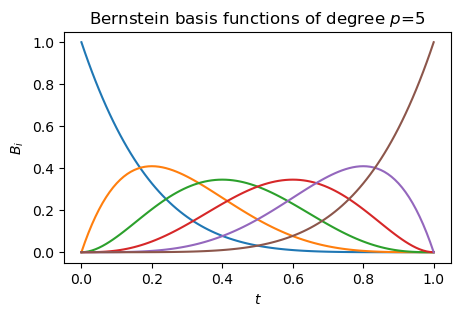

PyObject Text(26.4, 0.5, '$B_i$')

In [132]:
# Evaluate each term at all the points in 'x', going from 0 to 1
h = 0.01
p = 5
x = collect(0:h:1)[:]
BEvals = zeros(p+1,length(x))
for i = 1:length(x)
    for j = 1:(p+1)
        BEvals[j,i] = bernstein_basis(j,p,x[i])
    end
end

# Plot each function from 0 to 1
figure_size = (5, 3)
plt.figure(figsize=figure_size)
for j = 1:(p+1)
    plt.plot(x,BEvals[j,:])
end
plt.title("Bernstein basis functions of degree \$p\$="*string(p))
plt.xlabel("\$t\$")
plt.ylabel("\$B_i\$")

# Bezier curves

A Bezier curve is a polynomial curve drawn in (typically) 2D or 3D space, by summing the product of a set of coefficients in spatial coordinates with the set of Bernstein bases.  These coefficients are called *control points*.

$$
\boldsymbol{X}(t) = \sum_i \boldsymbol{P}_i B_i(t)
$$

where the control point $\boldsymbol{P}_i$ is two or three dimensional vector specifying a point in space.

For example, suppose we wanted to draw a cubic Bezier curve on a 2D plane.  We may select the following points:

$$
\boldsymbol{P}_1 = \begin{bmatrix}
           0.0 \\
           0.0 \\
         \end{bmatrix}\hspace{1mm}
\boldsymbol{P}_2 = \begin{bmatrix}
           1.0 \\
           0.5 \\
         \end{bmatrix}\hspace{1mm}
\boldsymbol{P}_3 = \begin{bmatrix}
           0.5 \\
           1.5 \\
         \end{bmatrix}\hspace{1mm}
\boldsymbol{P}_4 = \begin{bmatrix}
           2.0 \\
           2.0 \\
         \end{bmatrix}
$$

Then, we draw the curve by evaluating the following equation

$$
\boldsymbol{X}(t) = \boldsymbol{P}_1 B_1(t) + \boldsymbol{P}_2 B_2(t)  + \boldsymbol{P}_3 B_3(t)  + \boldsymbol{P}_4 B_4(t) 
$$

In Julia, we can draw it this way:

In [133]:

"""
function draw_bezier_curve(
                        P::Array{Float64,2},
                       t::Array{Float64})::Array{Float64,2}
============================
# Parameters
* P: Positions of the control points (dim_s-by-(p+1) matrix)
* t: Array of values t between 0 and 1

# Returns
* Matrix of dimension dim_s-by-n, containing the positions of the curve at each value t.
"""
function draw_bezier_curve(
                    P::Array{Float64,2},
                    t::Array{Float64})::Array{Float64,2}

    # The spatial dimension
    dim_s = size(P)[1]
    
    # The degree of the curve
    p = size(P)[2]-1

    # Compute the curve position for each value of t.
    X = zeros(dim_s,length(t))
    for i = 1:length(t)
        for d = 1:dim_s
            X[d,i] = 0.0
            for k = 1:(p+1)
                X[d,i] += P[d,k] * bernstein_basis(k,p,t[i])
            end
        end
    end
    
    # Return the result.
    return X
end


"""
function draw_bezier_curve(
                        P::Array{Float64,2},
                        n::Int64)
============================
# Parameters
* P: Positions of the control points (dim_s-by-(p+1) matrix)
* n: The number of points (a.k.a. h = 1/n)

# Returns
* Tuple containing
    Matrix of dimension dim_s-by-n, containing the positions of the curve at each value t.
    Array containing each value t.
"""
function draw_bezier_curve(
                    P::Array{Float64,2},
                    n::Int64)::Tuple{Array{Float64,2},Array{Float64}}
  
    # Generate each value of t
    h = 1.0/n
    t = collect(0:h:1)[:]
    
    # Compute the curve position for each value of t.
    result = draw_bezier_curve( P, t )
    
    # Return the result.
    return result, t;
end

draw_bezier_curve

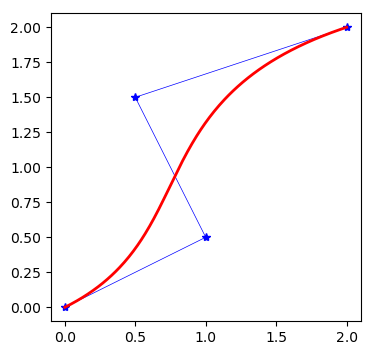

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe18a6627b8>

In [134]:
#using PyPlot
#plt = PyPlot

# Cubic bezier curve
p = 3

# The spatial dimension
dim_s = 2

# The control points
P = Array{Float64,2}([
        0.0 1.0 0.5 2.0
        0.0 0.5 1.5 2.0 ])

X,t = draw_bezier_curve( P, 200 )

# Draw the curve
figure_size = (4, 4)
plt.figure(figsize=figure_size)
plt.plot(P[1,:],P[2,:],"-*",color="b",linewidth=0.5)
plt.plot(X[1,:],X[2,:],"-",color="r",linewidth=2)


The control points are in blue, and the Bezier curve is in red.  The thin lines between the control points is sometimes referred to as the *control mesh*.

# De Casteljau's algorithm

An intuitive geometric algorithm for constructing a Bezier curve from a set of control points is de Casteljau's algorithm.

De Casteljau's algorithm begins with the control mesh - lines connecting the control points, forming a mesh. Along each line, a new point is created a fractional distance along the line determined by the parameter $t \in (0,1)$.  Then, new lines are drawn between these new points, and the process is repeated until there is only one point left.  This point lies on the Bezier curve.

An example will make this clear.

In [135]:
# using Plots

# Using the GR backend in Plots.
Plots.gr()

Plots.GRBackend()

## Drawing the lines for de Casteljau's algorithm

Here we use Julia to define a couple functions which help draw the lines and points at each step of de Casteljau's algorithm

In [136]:
"""
function decasteljau_lines_at_t(
                        t::Float64,
                        P::Array{Float64,2} )::Array{Array{Float64,2}}
============================
# Parameters
* t: The parameter value
* P: Positions of the control points (dim_s-by-n matrix)

# Returns
* Array of matrices, one matrix for each de-casteljau algorithm step,
  containing the endpoints of the lines.
"""
function decasteljau_lines_at_t(
                        t::Float64,
                        P::Array{Float64,2} )::Array{Array{Float64,2}}
   
    # The results are stored here.
    result = Array{Array{Float64,2},1}()
 
    # The spatial dimension
    dim_s = size(P)[1]
    
    # Collect the points for each de-casteljau algorithm step
    n = size(P)[2]-1
    step = 0
    while( n > 0 )
        newpoints = zeros(dim_s,n)
        prevpoints = nothing
        if( step == 0 )
            prevpoints = P
        else
            prevpoints = result[step]     
        end
        for i = 1:n
            newpoints[:,i] = prevpoints[:,i] + t * (prevpoints[:,i+1] - prevpoints[:,i])
        end
        push!(result,newpoints)
        step += 1
        n -= 1
    end
    
    # Return the result
    return result;
end

decasteljau_lines_at_t

Next, we show that we can draw these lines for a particular parameter value $t = 0.33$

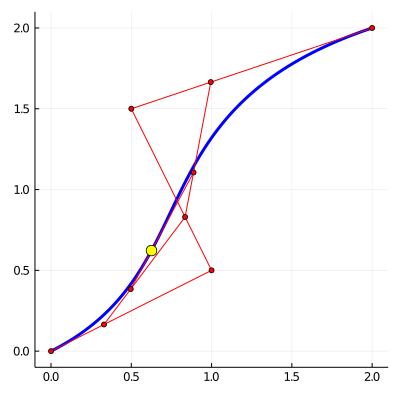

In [137]:
# Cubic bezier curve
p = 3

# The spatial dimension
dim_s = 2

# The control points
P = Array{Float64,2}([
        0.0 1.0 0.5 2.0
        0.0 0.5 1.5 2.0 ])

# Compute the curve position at each value of t.
X,t = draw_bezier_curve( P, 200 )

# Determine the min and max of the area to be plotted.
pxmin = minimum(P[1,:])
pxmax = maximum(P[1,:])
pymin = minimum(P[2,:])
pymax = maximum(P[2,:])
offsetx = (pxmax-pxmin)*0.05
offsety = (pxmax-pxmin)*0.05
plotxmin = pxmin - offsetx
plotxmax = pxmax + offsetx
plotymin = pymin - offsety
plotymax = pymax + offsety

# Plot the curve
Plots.default(overwrite_figure=true)
fig = Plots.plot()
Plots.plot!( fig, X[1,:], X[2,:],
            leg = false,
            xlims = (-0.1, 2.1),
            ylims = (-0.1, 2.1),
            size= (400,400),
            lw=3,
            linecolor=:blue )

# Plot the control points.
Plots.plot!( fig, P[1,:], P[2,:],
            leg = false,
            xlims = (plotxmin, plotxmax),
            ylims = (plotymin, plotymax),
            size= (400,400),
            lw=1,
            linecolor=:red )
Plots.scatter!( fig, P[1,:], P[2,:],
            leg = false,
            xlims = (plotxmin, plotxmax),
            ylims = (plotymin, plotymax),
            size= (400,400),
            markersize=3,
            markercolor=:red )

# Pick a t-value
tval = 0.33

# Collect the decasteljau lines at an arbitrary t value.
DCL = decasteljau_lines_at_t( tval, P )::Array{Array{Float64,2}}
for i = 1:length(DCL)
    dcjl = DCL[i]
    Plots.plot!( fig, dcjl[1,:], dcjl[2,:],
                leg = false,
                xlims = (plotxmin, plotxmax),
                ylims = (plotymin, plotymax),
                size= (400,400),
                lw=1,
                linecolor=:red )
    if i == length(DCL)
        Plots.scatter!( fig, dcjl[1,:], dcjl[2,:],
                        leg = false,
                        xlims = (plotxmin, plotxmax),
                        ylims = (plotymin, plotymax),
                        size= (400,400),
                        markersize=6,
                        markercolor=:yellow )
    else
        Plots.scatter!( fig, dcjl[1,:], dcjl[2,:],
                        leg = false,
                        xlims = (plotxmin, plotxmax),
                        ylims = (plotymin, plotymax),
                        size= (400,400),
                        markersize=3,
                        markercolor=:red )
    end
end

display(fig)

Finally, we can create an animation that intuatively shows how de Casteljau's algorithm draws a Bezier curve.  The reader may adjust the values of the control points, or the degree, to see various curves and get an intuition for how the algorithm works.  Hint: Try setting $p=4$ and the control points to $(0,0)$, $(0.25,1)$, $(0.5,0)$, $(0.75,0)$, and $(1,0)$.

┌ Info: Saved animation to 
│   fn = /Users/stevenschmidt/Documents/phd/Writings/49_UsplineTutorial_Jupyter/fig_bezier_curve_with_decasteljau_00.gif
└ @ Plots /Users/stevenschmidt/.julia/packages/Plots/5ItHH/src/animation.jl:104


Plots.AnimatedGif("/Users/stevenschmidt/Documents/phd/Writings/49_UsplineTutorial_Jupyter/fig_bezier_curve_with_decasteljau_00.gif")
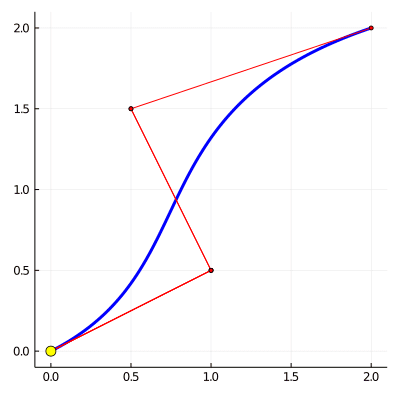

In [138]:
# Cubic bezier curve
p = 3

# The spatial dimension
dim_s = 2

# The control points
P = Array{Float64,2}([
        0.0 1.0 0.5 2.0
        0.0 0.5 1.5 2.0 ])

# Compute the curve position at each value of t.
X,t = draw_bezier_curve( P, 200 )

# Determine the min and max of the area to be plotted.
pxmin = minimum(P[1,:])
pxmax = maximum(P[1,:])
pymin = minimum(P[2,:])
pymax = maximum(P[2,:])
offsetx = (pxmax-pxmin)*0.05
offsety = (pxmax-pxmin)*0.05
plotxmin = pxmin - offsetx
plotxmax = pxmax + offsetx
plotymin = pymin - offsety
plotymax = pymax + offsety

anim = Animation()
for tval = range(0, stop = 1, length = 100)

    # Draw the curve
    Plots.default(overwrite_figure=true)
    fig = Plots.plot()
    Plots.plot!( fig, X[1,:], X[2,:],
                leg = false,
                xlims = (plotxmin, plotxmax),
                ylims = (plotymin, plotymax),
                size= (400,400),
                lw=3,
                linecolor=:blue )

    # Plot the control points.
    Plots.plot!( fig, P[1,:], P[2,:],
                leg = false,
                xlims = (plotxmin, plotxmax),
                ylims = (plotymin, plotymax),
                size= (400,400),
                lw=1,
                linecolor=:red )
    Plots.scatter!( fig, P[1,:], P[2,:],
                leg = false,
                xlims = (plotxmin, plotxmax),
                ylims = (plotymin, plotymax),
                size= (400,400),
                markersize=3,
                markercolor=:red )
    
    # Collect the decasteljau lines at an arbitrary t value.
    DCL = decasteljau_lines_at_t( tval, P )::Array{Array{Float64,2}}
    for i = 1:length(DCL)
        dcjl = DCL[i]
        Plots.plot!( fig, dcjl[1,:], dcjl[2,:],
                    leg = false,
                    xlims = (-plotxmin, plotxmax),
                    ylims = (-plotymin, plotymax),
                    size= (400,400),
                    lw=1,
                    linecolor=:red )
        if i == length(DCL)
            Plots.scatter!( fig, dcjl[1,:], dcjl[2,:],
                            leg = false,
                            xlims = (plotxmin, plotxmax),
                            ylims = (plotymin, plotymax),
                            size= (400,400),
                            markersize=6,
                            markercolor=:yellow )
        else
            Plots.scatter!( fig, dcjl[1,:], dcjl[2,:],
                            leg = false,
                            xlims = (plotxmin, plotxmax),
                            ylims = (plotymin, plotymax),
                            size= (400,400),
                            markersize=3,
                            markercolor=:red )
        end
    end
    
    frame(anim)
end
gif(anim, "fig_bezier_curve_with_decasteljau_00.gif", fps = 15)

# B-splines:  Connected sequences of Bezier curves

In concept, B-splines are a connected squence of one or more Bezier curves, with the additional constraint that a certain continuity is enforced at the connection points.  An algorithm called *de Boor's algorithm*, which is in many ways a generalization of de Casteljau's algorithm, defines a B-spline from a given *degree* and a given sequence of numbers called a *knot vector*.   Under this definition, B-splines are restricted such that all the connected Bezier curves must be the same degree.  This restriction will be lifted later when we introduce one-dimensional U-splines.

## Summary of de Boor's algorithm

De Boor's algorithm is used to construct a set of $n$ basis functions which span all the Bezier curves that make up the B-spline, and together ensure the required continuity is maintained between the Bezier curves.  This algorithm assumes it has been provided a degree $p$ and a knot vector $\boldsymbol{k}$ containing a sequence of $n+p-1$ non-decreasing values.  These values may repeat or increase, but not decrease.

A couple things to be aware of:

* Since we are using Julia, which uses 1-based indexing, the definition below assumes that the values of the knot vector are indexed $1...n+p-1$.
* De Boor's algorithm sometimes requests indices into the knot vector which are below or above the vector's index-range.  In this case, a repeated value of the lowest or highest knot value is returned.

Given a degree $p$ and a knot vector $\boldsymbol{k}$ with values $k_i, i = 1...n+p-1$, a set of basis functions $N_{i,p}, i = 1...n$ are defined recursively as follows.

\begin{equation}
N_{i,0}(t) =
	\begin{cases}
    	1 \text{ if } k_{i-1} \le t \le k_{i} \\[0.1em]
        0 \text{ otherwise }
    \end{cases}
\end{equation}

\begin{equation}
N_{i,p}(t) = \frac{t-k_{i-1}}{k_{i+p-1}-k_{i-1}} N_{i,p-1}(t) + \frac{k_{i+p}-t}{k_{i+p}-k_{i}}N_{i+1,p-1}(t)
\end{equation}

If provided with a set of control points $\boldsymbol{P}_i$, a B-spline curve of degree $p$ with knot vector $\boldsymbol{k}$ is determined by evaluating the following equation, given parameter $t \in [\min(\boldsymbol{k}),\max(\boldsymbol{k})]$.

\begin{equation}
\boldsymbol{P}(t) = \sum_i N_{i,p}(t) \boldsymbol{P}_i
\end{equation}


Let's jump in and implement this definition in Julia, and see what these basis functions look like for a few example knot vectors.

In [139]:
"""
function knot_at_index(
                    knot_v::Array{Float64},
                    i::Int64)::Float64
=======
Returns the knot at index i, or
if i < 1, then returns knot_v[1]
if i > length(knot_v), then returns knot_v[end]

# Parameters:
* knot_v: The knot vector
* i: The desired index
"""
function knot_at_index(
                    knot_v::Array{Float64},
                    i::Int64)::Float64
    if(i < 1)
        return knot_v[1]
    elseif(i > length(knot_v))
        return knot_v[end]
    end
    return knot_v[i]
end


"""
function b_spline_basis(
                    i::Int64,
                    p::Int64,
                    knot_v::Array{Float64},
                    t::Union{Float64,ComplexF64})::Union{Float64,ComplexF64}
=========
# Parameters:
* i: knot index (1-indexed)
* p: The degree of the curve
* knot_v: The knot vector (Array of Float64)
* t: The parameter value where the basis function is evaluated
"""
function b_spline_basis(
                    i::Int64,
                    p::Int64,
                    knot_v::Array{Float64},
                    t::Union{Float64,ComplexF64})::Union{Float64,ComplexF64}
    
    tol = 1e-14::Float64
    result = 0.0
    if( p >= 0 )
        if( p == 0 )
            result += convert( Int64, ( real(t) >= knot_at_index(knot_v,i-1) ) && ( real(t) < knot_at_index(knot_v,i) ) )
            return result
        else
            denominator_1 = knot_at_index(knot_v,i+p-1) - knot_at_index(knot_v,i-1)
            if( abs(denominator_1) > tol )
                result += ((t - knot_at_index(knot_v,i-1)) / denominator_1 ) * b_spline_basis(i, p-1, knot_v, t)
            end

            denominator_2 = knot_at_index(knot_v,i+p) - knot_at_index(knot_v,i)
            if( abs(denominator_2) > tol )
                result += ( (knot_at_index(knot_v,i+p) - t) / denominator_2 ) * b_spline_basis(i+1, p-1, knot_v, t)
            end

            return result
        end
    else
        return result
    end
end

b_spline_basis

First, let's look at the basis functions of a cubic B-spline which is equivalent to a cubic Bezier curve (thus, the basis functions are equivalent to the Bernstein basis).  To do so, we select $p=3$ and provide the knot vector
$$
    \boldsymbol{k} = \begin{matrix}
           0 \; 0 \; 0 \; 1 \; 1 \; 1 \; \\
         \end{matrix}\hspace{1mm}
$$

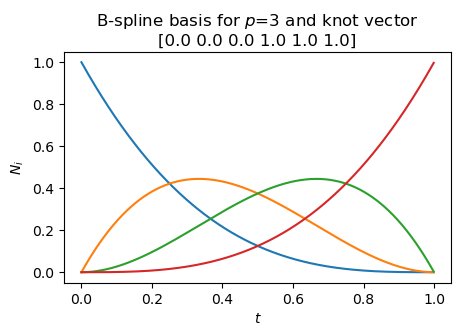

PyObject Text(26.4, 0.5, '$N_i$')

In [140]:
#using PyPlot
#plt = PyPlot

knotv = Array{Float64}([ 0 0 0 1 1 1 ])
p = 3
h = 0.001
t = collect(0:h:maximum(knotv)-h)[:]
N = zeros( length(knotv)-p+1, length(t) )
for j = 1:size(N)[1]
    for i = 1:length(t)
        N[j,i] = b_spline_basis(j,p,knotv,t[i])
    end
end

figure_size = (5, 3)
plt.figure(figsize=figure_size)
for j = 1:size(N)[1]
   plt.plot(t, N[j,:] )
end
plt.title("B-spline basis for \$p\$="*string(p)*" and knot vector\n"*string(knotv))
plt.xlabel("\$t\$")
plt.ylabel("\$N_i\$")

## Notes about knot vectors

There are several things that are important to know about how to read knot vectors.  I list them here in no particular order.  Each of these things helps recognize how a B-spline will look and behave, just by examining the knot vector.

* The knots of the knot vector may be grouped into all possible contiguous sequences of $p$ knots. Each grouping corresponds to a basis function (and/or control point).  For example, the knot vector $0 0 0 1 1 1$ results in the following groupings:
$$
    0 0 0
$$
$$
    0 0 1
$$
$$
    0 1 1
$$
$$
    1 1 1
$$
These groupings are called *polar coordinates*.

* The parameter-space of the B-spline extends from the smallest-valued knot to the largest-valued knot.  For example, a quadratic B-spline with the knot vector $0 0 1 2 3 3$ is parameterized $t \in (0,3)$.

* The span of each Bezier curve in the B-spline may be identified by looking at the list of unique knots.  For example, a quadratic ($p=2$) B-spline with knot vector $0 0 1 2 3 3$ contains three Bezier curves: the first that extends from $t \in (0,1)$, the next that extends from $t \in (1,2)$, and the third that extends from $t \in (2,3)$.
         
* The continuity of a B-spline at the interfaces between Bezier curves may be determined by looking at the multiplicity of each knot (a.k.a. the number of times a knot value is found in the knot vector).  If the knot has multiplicity $m$, the continuity at the interface is $C^{p-m}$.  For example, consider a cubic ($p=3$) B-spline with knot vector $0 0 0 1 1 1 2 2 3 4 4 4$.  This B-spline consists of four Bezier curves.  The interface between the first and second Bezier curves is at $t=1$, and the multiplicity of the knot with value $1$ is $m=3$, so we may see that the continuity at this interface is $C^{p-m}$, or $C^{0}$.  Similarlly, we can see that the continuities at the next two interfaces are $C^{1}$ and $C^{2}$.

In the charts below, we demonstrate the continuity changing as a result of changing the multiplicity of a knot.  We begin with knot vector $ 0 0 0 1 1 1 2 2 3 4 4 4 $, but then gradually shift the sixth knot from a value of $1$ to a value of $2$.  It is interesting to observe how the basis changes, as a result of changing this knot value.  At first, the continuity at $t=1$ is $C^0$ (consistent with knot $1$ having a multiplicity of $m=3$).  However, as the knot value changes, the multiplicity of $1$ becomes $m=2$, resulting in the continuity at $t=1$ to become $C^1$.  When the changing knot value becomes $2$, the multiplicity at $t=2$ becomes $m=3$, resulting in the continuity at $t=2$ to become $C^0$.

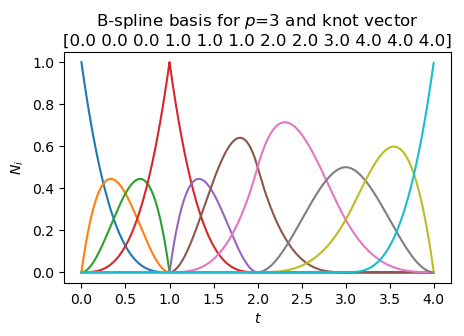

PyObject Text(26.4, 0.5, '$N_i$')

In [141]:
#using PyPlot
#plt = PyPlot

knotv = Array{Float64}([ 0 0 0 1 1 1 2 2 3 4 4 4 ])
p = 3
h = 0.001
t = collect(0:h:maximum(knotv)-h)[:]
N = zeros( length(knotv)-p+1, length(t) )
for j = 1:size(N)[1]
    for i = 1:length(t)
        N[j,i] = b_spline_basis(j,p,knotv,t[i])
    end
end

figure_size = (5, 3)
plt.figure(figsize=figure_size)
for j = 1:size(N)[1]
   plt.plot(t, N[j,:] )
end
plt.title("B-spline basis for \$p\$="*string(p)*" and knot vector\n"*string(knotv))
plt.xlabel("\$t\$")
plt.ylabel("\$N_i\$")

┌ Info: Saved animation to 
│   fn = /Users/stevenschmidt/Documents/phd/Writings/49_UsplineTutorial_Jupyter/fig_b_spline_basis_shifting_knotval_00.gif
└ @ Plots /Users/stevenschmidt/.julia/packages/Plots/5ItHH/src/animation.jl:104


Plots.AnimatedGif("/Users/stevenschmidt/Documents/phd/Writings/49_UsplineTutorial_Jupyter/fig_b_spline_basis_shifting_knotval_00.gif")
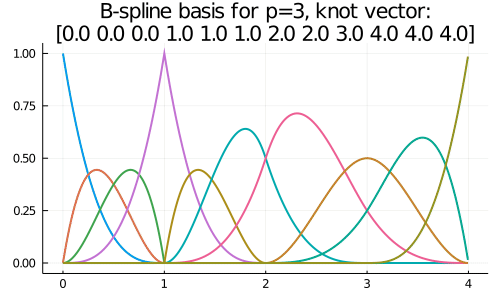

In [142]:
# Collecting the values that the animation loops through
ones_arr = 1.0.*ones(5)[:]
twes_arr = 2.0.*ones(10)[:]
vals_up = collect(1:0.01:2)[:]
vals_down = collect(2:-0.01:1)[:]
vals = cat(ones_arr, vals_up, twes_arr, vals_down, ones_arr,dims=(1))[:]

# Creating the animation
anim = Animation()
for i = 1:length(vals)
    k6 = vals[i]
    knotv = Array{Float64}([ 0 0 0 1 1 k6 2 2 3 4 4 4 ])
    p = 3
    h = 0.005
    t = collect(0:h:maximum(knotv)-h)[:]
    N = zeros( length(knotv)-p+1, length(t) )
    for j = 1:size(N)[1]
        for i = 1:length(t)
            N[j,i] = b_spline_basis(j,p,knotv,t[i])
        end
    end

    offsetx = (maximum(t)-minimum(t))*0.05
    offsety = 0.05
    plotxmin = minimum(t) - offsetx
    plotxmax = maximum(t) + offsetx
    plotymin = 0.0 - offsety
    plotymax = 1.0 + offsety

    Plots.default(overwrite_figure=true)
    fig = Plots.plot()
    figtitle = "B-spline basis for p="*string(p)*", knot vector:\n"*string(knotv)*""
    for j = 1:size(N)[1]
        Plots.plot!( fig, t, N[j,:],
                leg = false,
                title = figtitle,
                xlims = (plotxmin, plotxmax),
                ylims = (plotymin, plotymax),
                size= (500,300),
                lw=2 )
    end

    frame(anim)
end
gif(anim, "fig_b_spline_basis_shifting_knotval_00.gif", fps = 30)

## Drawing a B-spline

In [143]:
"""
function draw_b_spline_curve(
                        p::Int64,
                        knot_v::Array{Float64},
                        P::Array{Float64,2},
                        t::Array{Float64})::Array{Float64,2}
============================
# Parameters
* p: The degree of the B-spline
* knot_v: The knot vector (length n+p-1, where n is the number of control points)
* P: Positions of the control points ((dim_s-by-n) matrix, where n is the number of control points)
* t: Array of values t between 0 and 1

# Returns
* Matrix of dimension dim_s-by-n, containing the positions of the curve at each value t.
"""
function draw_b_spline_curve(
                    p::Int64,
                    knot_v::Array{Float64},
                    P::Array{Float64,2},
                    t::Array{Float64})::Array{Float64,2}

    # The spatial dimension
    dim_s = size(P)[1]

    # The number of control points
    num_cp = size(P)[2]
    
    # Compute the curve position for each value of t.
    X = zeros(dim_s,length(t))
    for i = 1:length(t)
        for d = 1:dim_s
            X[d,i] = 0.0
            for k = 1:num_cp
                X[d,i] += P[d,k] * b_spline_basis(k,p,knotv,t[i])
            end
        end
    end
    
    # Return the result.
    return X
end


"""
function draw_b_spline_curve(
                    p::Int64,
                    knot_v::Array{Float64},
                    P::Array{Float64,2},
                    n_points::Int64 )::Tuple{Array{Float64,2},Array{Float64}}
============================
# Parameters
* p: The degree of the B-spline
* knot_v: The knot vector (length n+p-1, where n is the number of control points)
* P: Positions of the control points ((dim_s-by-n) matrix, where n is the number of control points)
* n_points: The number of points (a.k.a. h = 1/n_points)

# Returns
* Tuple containing
    Matrix of dimension dim_s-by-n, containing the positions of the curve at each value t.
    Array containing each value t.
"""
function draw_b_spline_curve(
                    p::Int64,
                    knot_v::Array{Float64},
                    P::Array{Float64,2},
                    n_points::Int64 )::Tuple{Array{Float64,2},Array{Float64}}
  
    # Generate each value of t
    h = 1.0/n_points
    t = collect(0:h:maximum(knot_v)-h)[:]
    
    # Compute the curve position for each value of t.
    result = draw_b_spline_curve( p, knot_v, P, t )
    
    # Return the result.
    return result, t;
end

draw_b_spline_curve

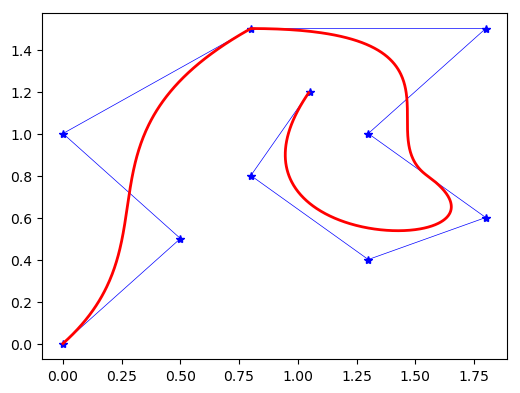

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe187a14208>

In [144]:
#using PyPlot
#plt = PyPlot

# The spatial dimension
dim_s = 2
# The degree
p = 3
# The knot vector
knotv = Array{Float64}([ 0 0 0 1 1 1 2 2 3 4 4 4 ])

# The control points
P = Array{Float64,2}([
        0.0 0.5 0.0 0.8 1.8 1.3 1.8 1.3 0.8 1.05
        0.0 0.5 1.0 1.5 1.5 1.0 0.6 0.4 0.8 1.2 ])

X,t = draw_b_spline_curve( p, knotv, P, 200 )

# Draw the curve
figure_size = (6, 4.5)
plt.figure(figsize=figure_size)
plt.plot(P[1,:],P[2,:],"-*",color="b",linewidth=0.5)
plt.plot(X[1,:],X[2,:],"-",color="r",linewidth=2)

# Using the greville abscissae to recover the B-spline basis

Given a set of B-spline basis functions, the *greville abscissae* are the coefficients which result in a linear parameterization.  In other words, when the control points are placed on the x-axis at the positions of the greville abscissae, then the "speed" that the B-spline is drawn (relative to the parameter $t$) is constant.  The greville abscissae can be computed from the knot vector by averaging the knots that make up the polar coordinate of each control point.

Let's do an example.  In the knot vector $0 0 0 1 1 1 2 2 3 4 4 4$, the greville abscissae are

If we place the control points on the x-axis at the greville abscissae, and then place the y-coordinate of all the control points to $y=0$ except for one (which we set to a $y=1$), then the B-spline curve will be identical to the B-spline basis function associated with the control point at $y=1$.

This may seem obvious to some readers, but to others it's a good thing to highlight, to help show how B-splines work.

In [145]:
"""
function greville_abscissae_from_knot_vector(
                                    p::Int64,
                                    knot_v::Array{Float64} )::Array{Float64}
============================
# Parameters
* p: The degree of the B-spline
* knot_v: The knot vector (length n+p-1, where n is the number of control points)

# Returns
* Array containing the greville abscissae value for each control point.
"""
function greville_abscissae_from_knot_vector(
                                    p::Int64,
                                    knot_v::Array{Float64} )::Array{Float64}
    n = (length(knot_v)-p+1)
    GA = zeros(n)
    for i = 1:(length(knot_v)-p+1)
        for j = 1:p
            GA[i] += knot_v[i+j-1]
        end
        GA[i] /= p
    end
    return GA
end

greville_abscissae_from_knot_vector

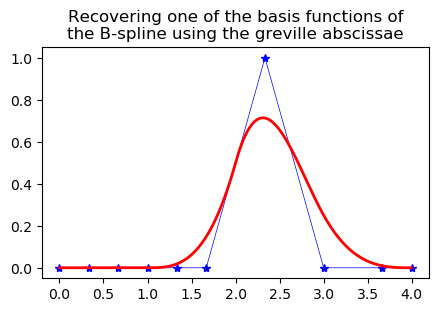

PyObject Text(0.5, 1.0, 'Recovering one of the basis functions of\nthe B-spline using the greville abscissae')

In [146]:
#using PyPlot
#plt = PyPlot

# The spatial dimension
dim_s = 2
# The degree
p = 3
# The knot vector
knotv = Array{Float64}([ 0 0 0 1 1 1 2 2 3 4 4 4 ])

# The control points
P = zeros(2,length(knotv)-p+1)
P[1,:] = greville_abscissae_from_knot_vector(p,knotv)

# We select the control point whose basis function we will recover
P[2,7] = 1.0

X,t = draw_b_spline_curve( p, knotv, P, 200 )

# Draw the curve
figure_size = (5, 3)
plt.figure(figsize=figure_size)
plt.plot(P[1,:],P[2,:],"-*",color="b",linewidth=0.5)
plt.plot(X[1,:],X[2,:],"-",color="r",linewidth=2)
plt.title("Recovering one of the basis functions of\nthe B-spline using the greville abscissae")